<a href="https://colab.research.google.com/github/afislonge/Algerian-forest-fire-ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Effective Handling of Errors
Ensure the dataset is clean, handle missing data, outliers, and ensure correct data types.

In [93]:
# Load the dataset
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Top 5
print("top 5 row using head")
print(df.head())
print()

# Bottom 5
print("bottom 5 row using head")
print(df.tail())
print()

# number of samples and columns
print("number of samples and columns")
print(df.shape)
print()

# number of entries in the dataframe
print("number of entries in the dataframe")
print(df.size)
print()

# column names in the dataframe
print("column names in the dataframe")
print(df.columns)
print()

# column name dtypes in the dataframe
print("column name dtypes in the dataframe")
print(df.dtypes)
print()

# dataframe info
print("dataframe info")
print(df.info())
print()

# check missing
print("check the missing value in each column")
print(df.isnull().sum())
print()

# check missing
print("check the missing value in each column")
print(df.isna().sum())
print()

# Check for duplicates
print("Check for duplicates")
print(df.duplicated().sum())
print()

# dataframe description
print("dataframe description")
print(df.describe())
print()

top 5 row using head
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  

bottom 5 row using head
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  

## Appropriate Feature Selection and Engineering
Identify and create the most relevant features for the model.

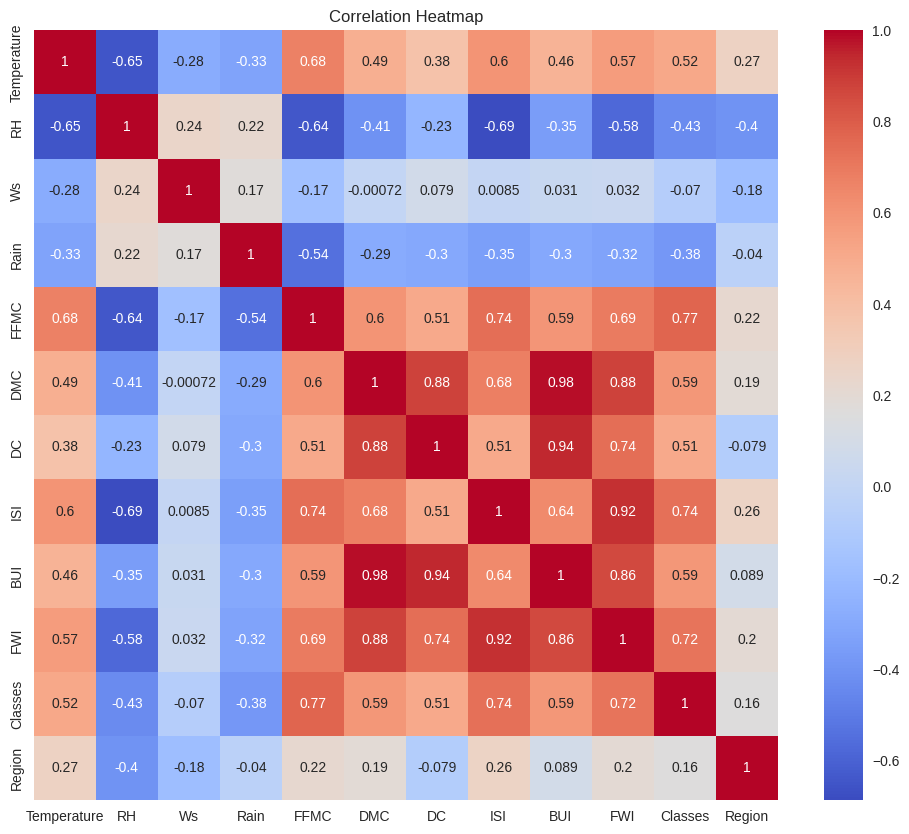

In [94]:
df_copy = df.drop(['day','month','year'],axis=1)

df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

corr = df_copy.corr()

# Heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [79]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [92]:
from sklearn.preprocessing import StandardScaler

df_copy = df.drop(['day','month','year'],axis=1)
# Selecting important features
features = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI']]
target = df['FWI']

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


KeyError: "['day', 'month', 'year'] not found in axis"

## Creation of Insightful Visualizations
Generate visualizations to understand the data distribution, relationships, and trends.

In [ ]:

## Plot desnity plot for all features
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Visualization 1: Temperature vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Temperature', data=df)
plt.title('Temperature vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Temperature (°C)')
plt.show()

# Visualization 2: RH vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='RH', data=df)
plt.title('Relative Humidity (RH) vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Relative Humidity (%)')
plt.show()

# Visualization 3: Wind Speed vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Ws', data=df)
plt.title('Wind Speed vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Wind Speed (km/h)')
plt.show()

# Visualization 4: Rain vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='Rain', data=df)
plt.title('Rain vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Rain (mm)')
plt.show()

# Visualization 5: FFMC vs. Fire Occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fire_Occurrence', y='FFMC', data=df)
plt.title('FFMC vs. Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('FFMC')
plt.show()

In [ ]:
# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Temperature vs. Fire Risk Index
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['FWI'], alpha=0.7, color='orange')
plt.title('Temperature vs. Fire Risk Index')
plt.xlabel('Temperature')
plt.ylabel('Fire Risk Index')
plt.show()

## Clear and Meaningful Observations Derived from the Visualizations
Extract meaningful insights from the visualizations to inform feature selection and modeling.

## Implementation of Multiple Linear Regression and Polynomial Regression Models
Build and compare linear and polynomial regression models to predict the target variable.

In [89]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df['Classes'].value_counts()



,count
Classes,
1,137
0,106


In [90]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [91]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


## Application of Regularization Techniques (Lasso, Ridge, etc.)
Implement and compare regularization techniques to prevent overfitting.

##  Effective Use of Cross-Validation and Hyperparameter Tuning
Optimize the models using cross-validation and tune hyperparameters for better performance.

## Comprehensive Evaluation of Model Performance
Assess the models using appropriate metrics and compare their performance.

## Testing the Model on Unseen Data
Validate the model on a test dataset and analyze the results.

## Proper Documentation of Code and Results
Ensure the code is well-documented with comments and markdown cells for clarity.